# Inputs And Outputs

<p> The dataset contains 43 different classes ,refer last cell (Appendix) for definition of each class </p>
<p> Images are 32 X 32 pixels (RGB channels) </p>


# IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

# Pre-devided Training ,Dev ,Test sets( 60%,20%,20%)

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train ,Y_train = train['features'],train['labels']
X_valid ,Y_valid = valid['features'],valid['labels']
X_test ,Y_test = test['features'],test['labels']

# IMAGES VISUALIZATION

4

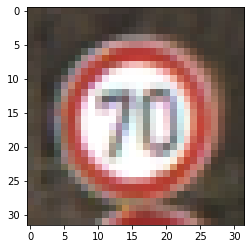

In [4]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
Y_train[i]

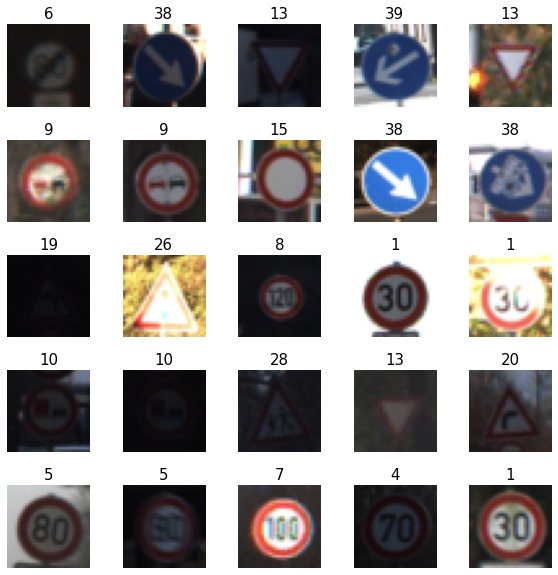

In [5]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in range(0,L_grid*W_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index],fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

        

# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [6]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

In [7]:
# Converting RGB images to gray scale images
X_train_gray = np.sum(X_train/3, axis = -1 ,keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = -1 ,keepdims = True)
X_test_gray = np.sum(X_test/3, axis = -1 ,keepdims = True)

In [8]:
# Normalizing the images
X_train_gray_norm = (X_train_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

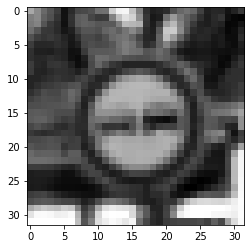

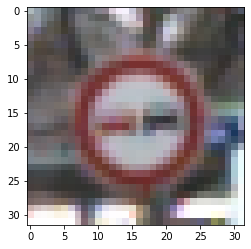

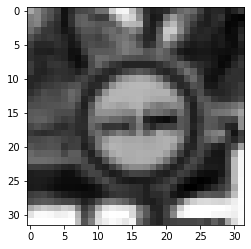

In [9]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#  DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [10]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation = 'relu',input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.BatchNormalization())
CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(20,(3,3),activation = 'relu'))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.BatchNormalization())
CNN.add(layers.Dropout(0.2))

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation = 'relu'))
CNN.add(layers.Dropout(0.5))

CNN.add(layers.Dense(84,activation = 'relu'))
CNN.add(layers.Dropout(0.5))

CNN.add(layers.Dense(43,activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 6)         24        
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 20)        1100      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 20)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 20)          8

# COMPILE AND TRAIN DEEP CNN MODEL

In [11]:
CNN.compile(optimizer='Adam' ,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = CNN.fit(X_train_gray_norm,
                  Y_train,
                  batch_size = 500,
                  epochs = 50 ,
                  verbose = 1,
                  validation_data = (X_valid_gray_norm,Y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 26s 746us/sample - loss: 3.6225 - accuracy: 0.1064 - val_loss: 3.6520 - val_accuracy: 0.1365
Epoch 2/50
34799/34799 [==============================] - 25s 723us/sample - loss: 2.6664 - accuracy: 0.2958 - val_loss: 3.2832 - val_accuracy: 0.2000
Epoch 3/50
34799/34799 [==============================] - 26s 743us/sample - loss: 1.8738 - accuracy: 0.4637 - val_loss: 2.8795 - val_accuracy: 0.2467
Epoch 4/50
34799/34799 [==============================] - 26s 733us/sample - loss: 1.3981 - accuracy: 0.5755 - val_loss: 2.4843 - val_accuracy: 0.2755
Epoch 5/50
34799/34799 [==============================] - 26s 743us/sample - loss: 1.1140 - accuracy: 0.6534 - val_loss: 1.7809 - val_accuracy: 0.4454
Epoch 6/50
34799/34799 [==============================] - 25s 731us/sample - loss: 0.9282 - accuracy: 0.7088 - val_loss: 1.0754 - val_accuracy: 0.6551
Epoch 7/50
34799/34799 [=====================

# ASSESS TRAINED CNN MODEL PERFORMANCE (With Confusion Matrix)

In [13]:
score = CNN.evaluate(X_test_gray_norm, Y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 357us/sample - loss: 0.2003 - accuracy: 0.9522
Test Accuracy: 0.9521773457527161


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

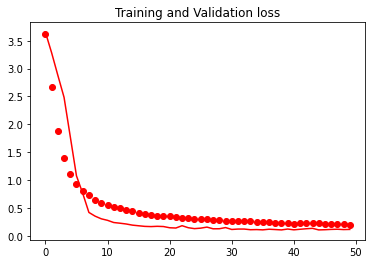

In [16]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation loss')

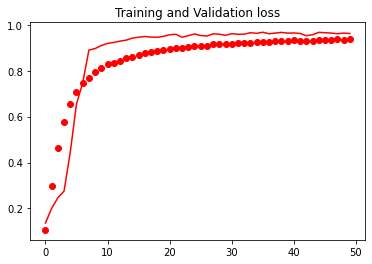

In [17]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label = 'Training loss')
plt.plot(epochs,val_accuracy,'r',label = 'Validation Loss')
plt.title('Training and Validation loss')

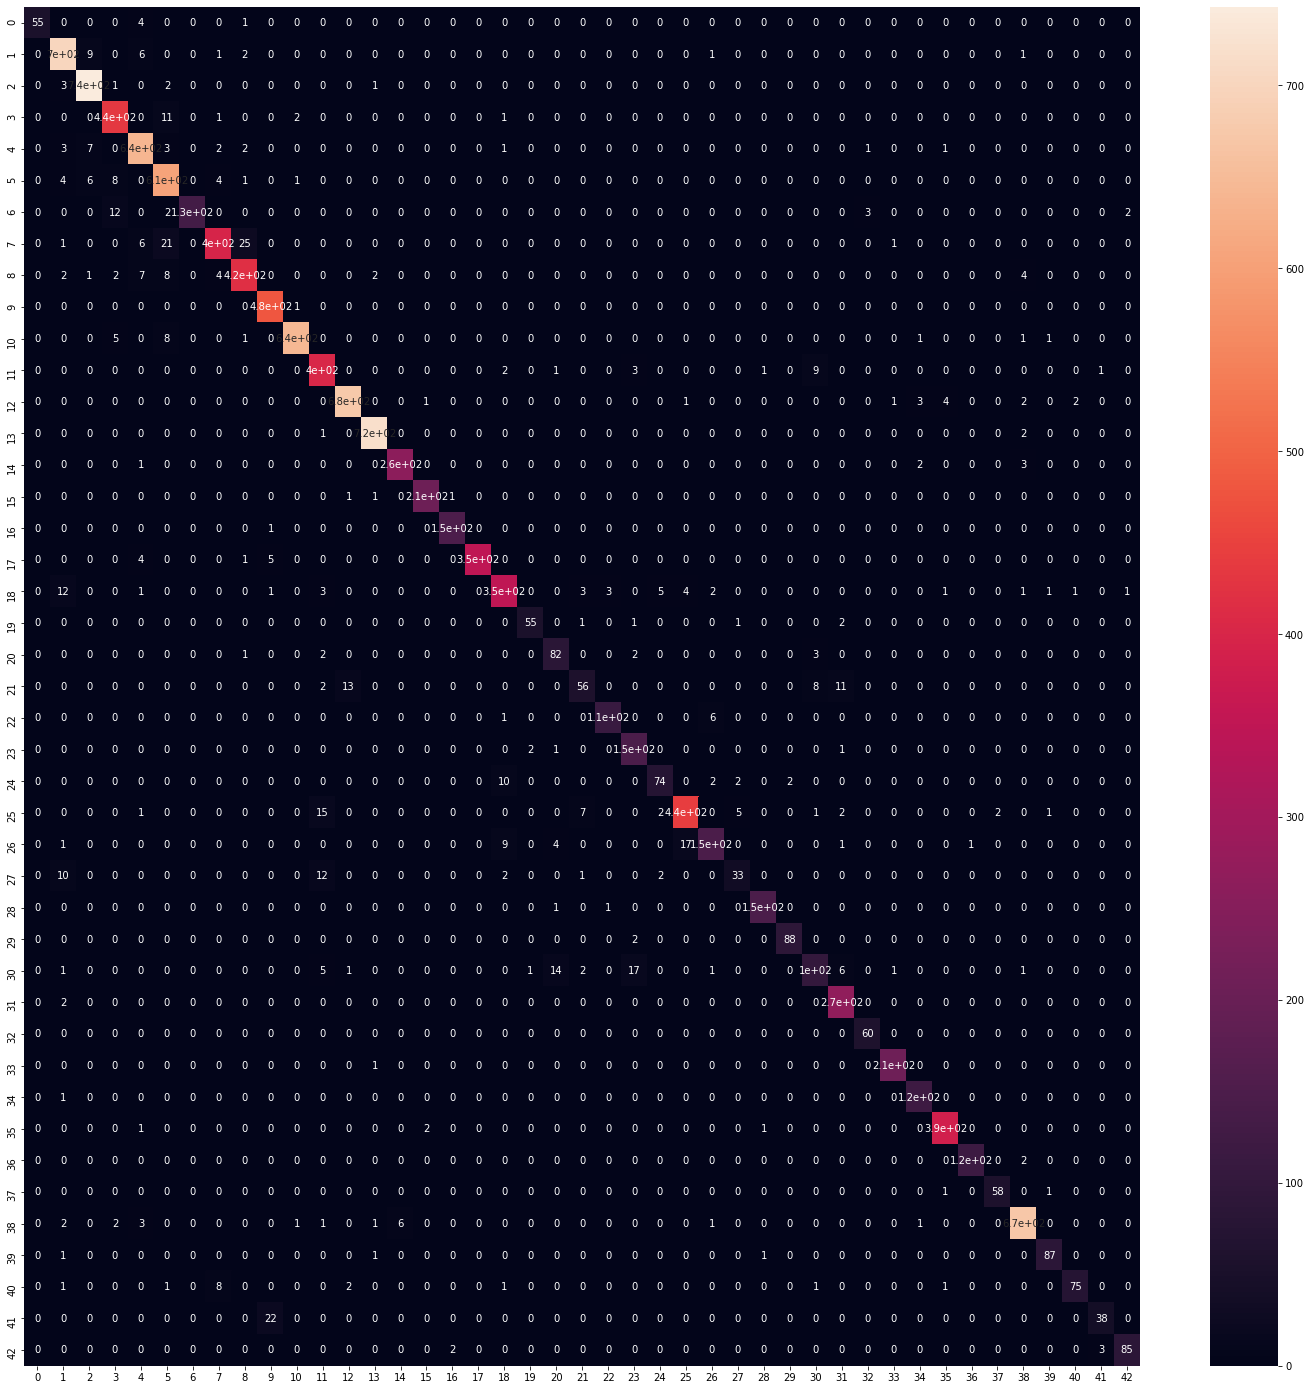

In [18]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = Y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

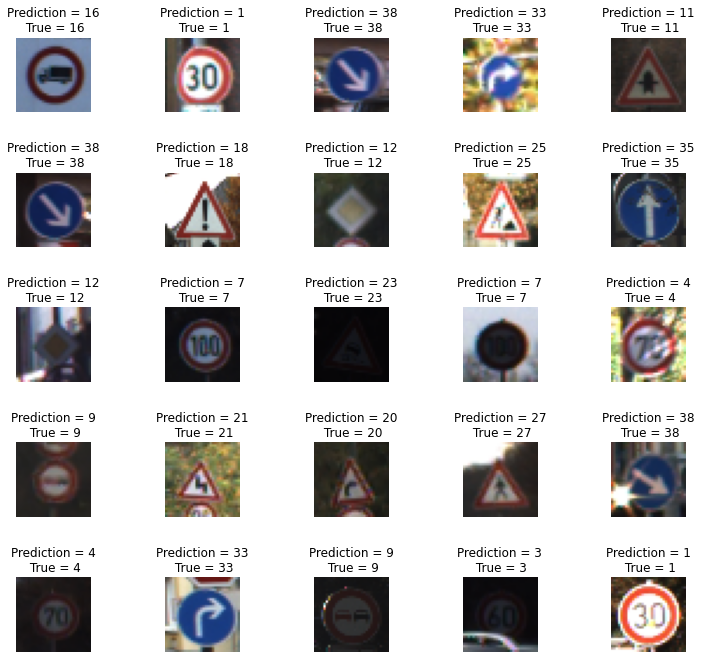

In [19]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }